# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

There are a lot of leads generated in the initial stage but only a few of them come out as paying customer. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

## Business Goal

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

There are quite a few goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## Reading and Understanding the data

In [1]:
# necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# importing the dataset
leadScore_dataFrame = pd.read_csv('Leads.csv')
leadScore_dataFrame.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# exploring the dataset
leadScore_dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
leadScore_dataFrame.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# shape of the dataset
leadScore_dataFrame.shape

(9240, 37)

In [6]:
# columns in the dataset
leadScore_dataFrame.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
# checking for null values
leadScore_dataFrame.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

we can see there are a lot of columns with null values, we calculate the % of null values in each column

In [8]:
# % of null values
leadScore_dataFrame.isnull().sum() / leadScore_dataFrame.shape[0] * 100.00

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

## Data cleaning

In [9]:
# dropping columns with null values more than 30 %

colsToBeDropped = ['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index',
                  'Lead Quality','Tags']

leadScore_dataFrame.drop(colsToBeDropped,axis=1,inplace=True)

In [10]:
leadScore_dataFrame.shape

(9240, 31)

In [11]:
leadScore_dataFrame.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [12]:
# % of null values
leadScore_dataFrame.isnull().sum() / leadScore_dataFrame.shape[0] * 100.00

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [13]:
# we can further drop 'City' and 'Country' columns as they are not relevant for the analysis

leadScore_dataFrame.drop(['City','Country'],axis=1,inplace=True)

In [14]:
leadScore_dataFrame.shape

(9240, 29)

In [15]:
# % of null values
leadScore_dataFrame.isnull().sum() / leadScore_dataFrame.shape[0] * 100.00

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

there are a few columns where value is 'select' since the student did not select that category. They are as good as Nan. Converting these values.

In [16]:
leadScore_dataFrame['Specialization'] = leadScore_dataFrame['Specialization'].replace('Select', np.nan)
leadScore_dataFrame['How did you hear about X Education'] = leadScore_dataFrame['How did you hear about X Education'].replace('Select', np.nan)
leadScore_dataFrame['Lead Profile'] = leadScore_dataFrame['Lead Profile'].replace('Select', np.nan)

In [17]:
# % of null values
leadScore_dataFrame.isnull().sum() / leadScore_dataFrame.shape[0] * 100.00

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [18]:
# dropping column with more than 30% null values
leadScore_dataFrame.drop(['Lead Profile','How did you hear about X Education','Specialization',],axis=1,inplace=True)

In [19]:
# % of null values
leadScore_dataFrame.isnull().sum() / leadScore_dataFrame.shape[0] * 100.00

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

### Treating null values

In [20]:
leadScore_dataFrame['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [21]:
# replacing google with Google and replacing null values with mode i.e. Google
leadScore_dataFrame['Lead Source'] = leadScore_dataFrame['Lead Source'].replace('google', 'Google')
leadScore_dataFrame['Lead Source'] = leadScore_dataFrame['Lead Source'].replace(np.nan, 'Google')

In [22]:
leadScore_dataFrame['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [23]:
# 29% null values is still pretty high, better to drop this column

leadScore_dataFrame.drop(['What matters most to you in choosing a course',],axis=1,inplace=True)

In [24]:
leadScore_dataFrame['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [25]:
# replacing null values with median of the column
leadScore_dataFrame['Page Views Per Visit'] = leadScore_dataFrame['Page Views Per Visit'].replace(np.nan, leadScore_dataFrame['Page Views Per Visit'].median())

In [26]:
leadScore_dataFrame['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [27]:
# replacing null values with median of the column
leadScore_dataFrame['TotalVisits'] = leadScore_dataFrame['TotalVisits'].replace(np.nan, leadScore_dataFrame['TotalVisits'].median())

In [28]:
leadScore_dataFrame['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [29]:
# unsure for what to replace null values with, we can introduce a category 'Unknown'
leadScore_dataFrame['What is your current occupation'] = leadScore_dataFrame['What is your current occupation'].replace(np.nan, 'Unknown')

In [30]:
leadScore_dataFrame['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [31]:
# unsure for what to replace null values with, we can introduce a category 'Unsure'
leadScore_dataFrame['Last Activity'] = leadScore_dataFrame['Last Activity'].replace(np.nan, 'Unsure')

In [32]:
# % of null values
leadScore_dataFrame.isnull().sum() / leadScore_dataFrame.shape[0] * 100.00

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

In [33]:
for col in leadScore_dataFrame.columns:
    print("*********",col,"************")
    print("\n")
    print(leadScore_dataFrame[col].value_counts())
    print("\n")
    print("*********************")
    print("\n")

********* Prospect ID ************


7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64


*********************


********* Lead Number ************


660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64


*********************


********* Lead Origin ************


Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form         

In [34]:
# there are columns with just one value, dropping them
cols = ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content',
        'I agree to pay the amount through cheque']
leadScore_dataFrame.drop(cols,axis=1,inplace=True)

In [35]:
leadScore_dataFrame.shape

(9240, 20)

In [36]:
# % of null values
leadScore_dataFrame.isnull().sum() / leadScore_dataFrame.shape[0] * 100.00

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [37]:
leadScore_dataFrame.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


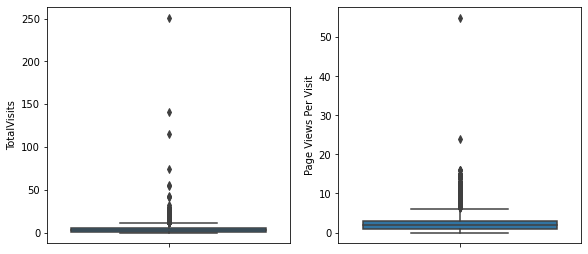

In [38]:
plt.figure(figsize=(20, 20))
plt.subplot(4,4,1)
sns.boxplot(y = 'TotalVisits', data = leadScore_dataFrame)

plt.subplot(4,4,2)
sns.boxplot(y = 'Page Views Per Visit',data = leadScore_dataFrame)
plt.show()

In [39]:
# we can see outliers in these 2 columns, removing rows with these outliers
ninetyNineQuantile = leadScore_dataFrame['TotalVisits'].quantile(0.99)
leadInfo = leadScore_dataFrame[leadScore_dataFrame["TotalVisits"] < ninetyNineQuantile]


ninetyNineQuantile = leadScore_dataFrame['Page Views Per Visit'].quantile(0.99)
leadInfo = leadScore_dataFrame[leadScore_dataFrame["Page Views Per Visit"] < ninetyNineQuantile]

In [40]:
leadScore_dataFrame.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


data is cleaned and ready for analysis

## EDA

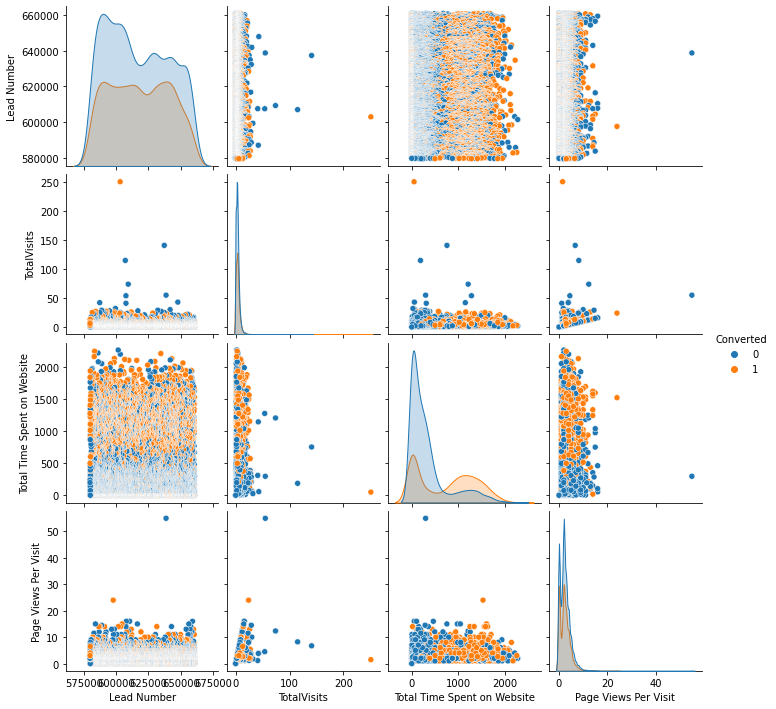

In [41]:
#pairplot
sns.pairplot(leadScore_dataFrame,diag_kind='kde',hue='Converted')
plt.show()

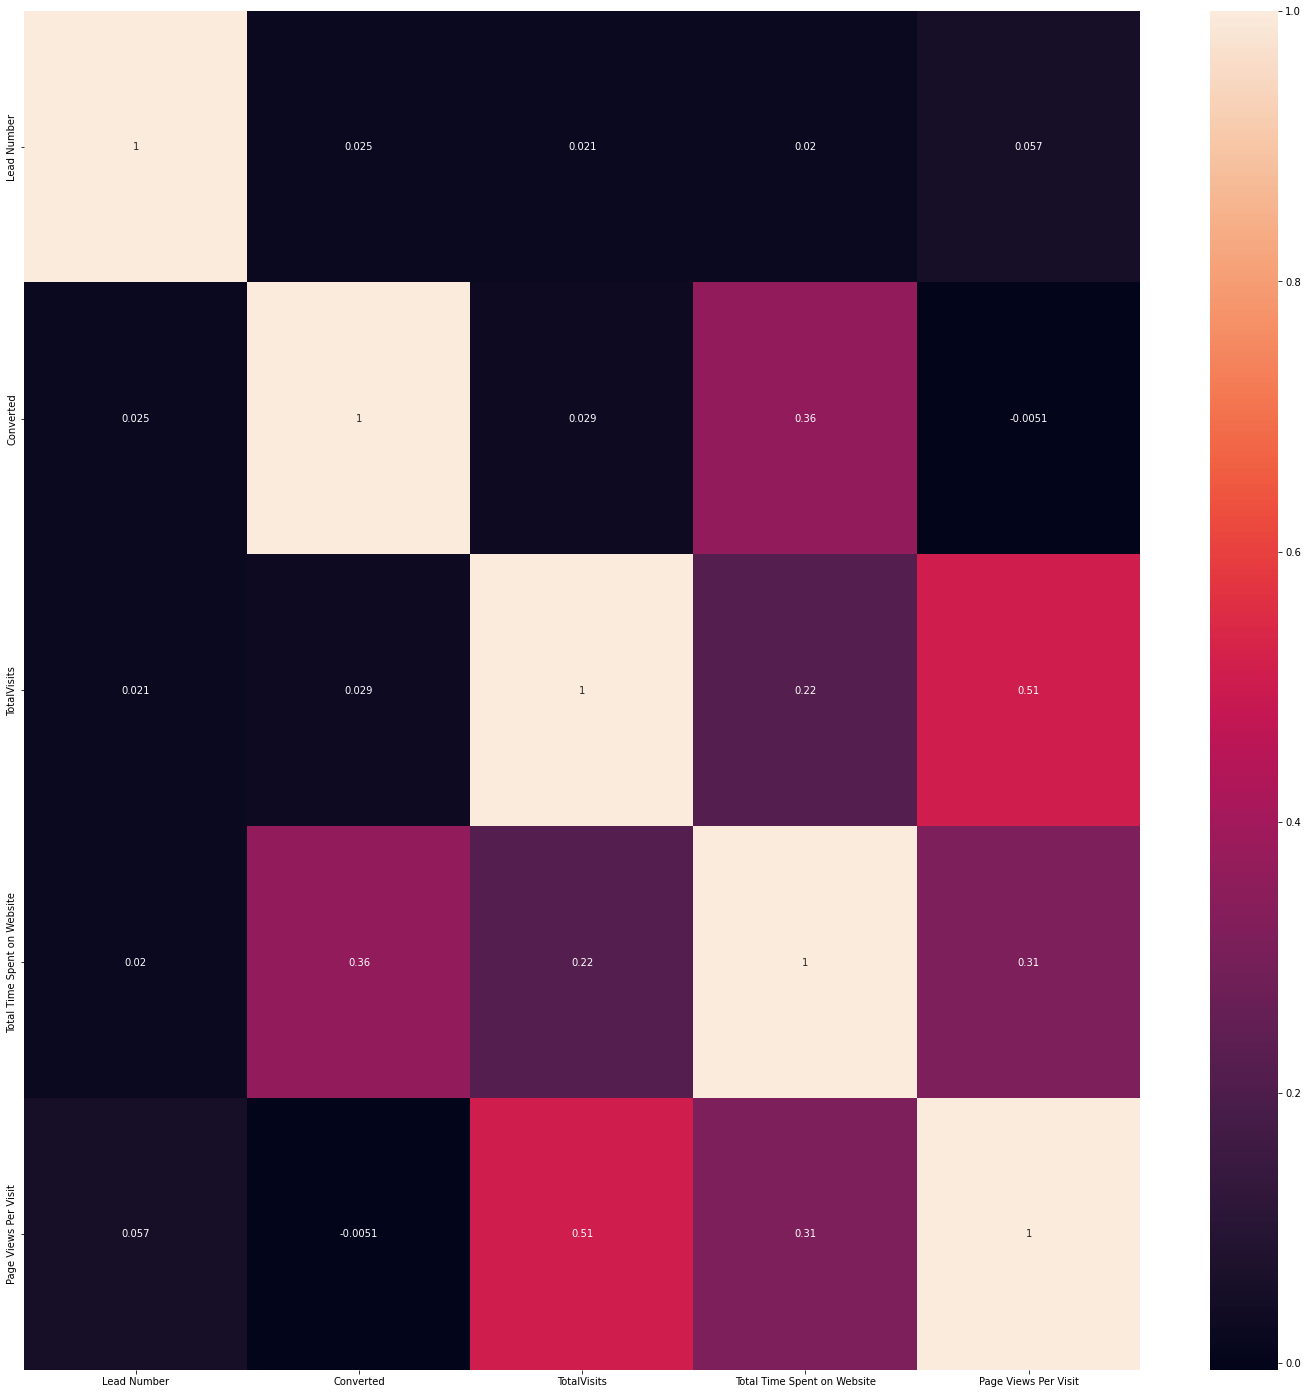

In [42]:
# Correlation matrix
plt.figure(figsize = (25,25))
sns.heatmap(leadScore_dataFrame.corr(),annot = True)
plt.show()

In [43]:
def plotGraph(col,df):
    plot = sns.catplot(x=col, hue = "Converted", kind="count", data=df, aspect= 2)
    title = col + ' Vs Converted'
    plt.title(title, fontsize = 14)
    plt.xlabel(col, fontsize = 12)
    plt.ylabel("Count", fontsize = 12)
    plt.xticks(rotation=90)
    ax = plot.facet_axis(0,0)
    for p in ax.patches:
        if np.isnan(p.get_height()):
            height = 0
        else:
            height = p.get_height()
        height = int(height)
        ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
        
    plt.show()

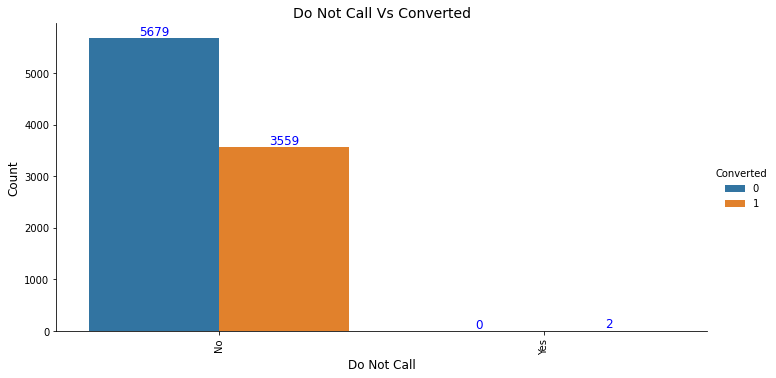

In [44]:
plotGraph("Do Not Call",leadScore_dataFrame)

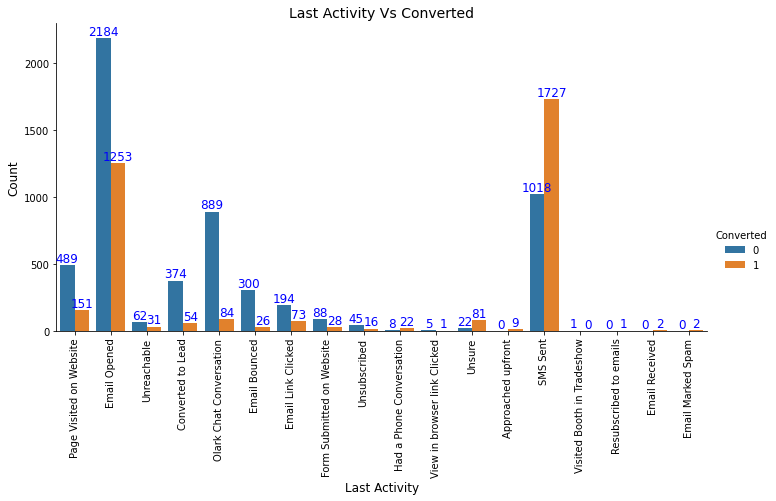

In [45]:
plotGraph("Last Activity",leadScore_dataFrame)

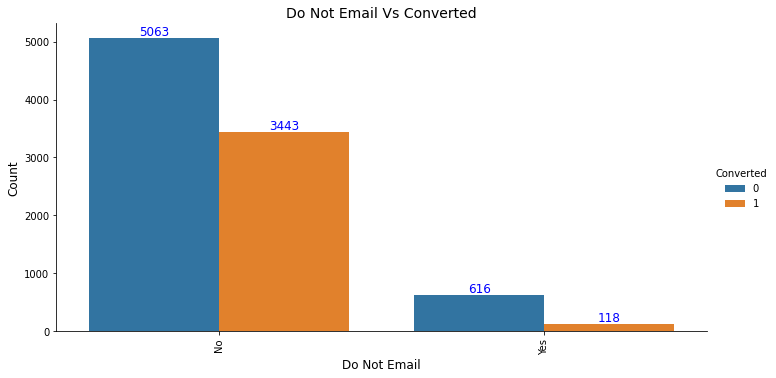

In [46]:
plotGraph("Do Not Email",leadScore_dataFrame)

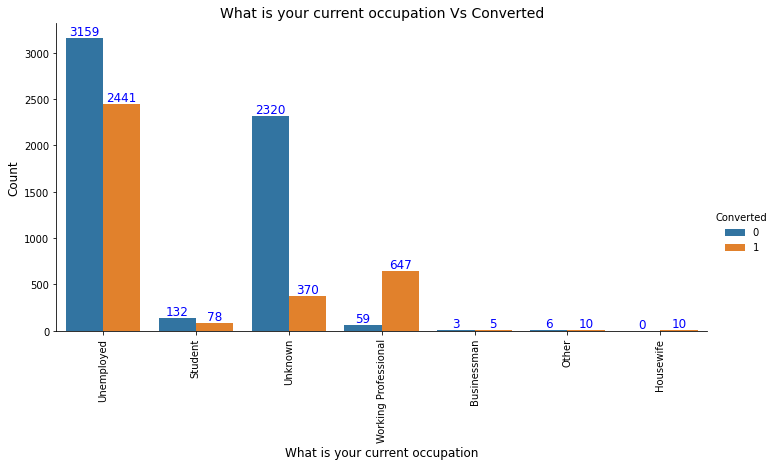

In [47]:
plotGraph("What is your current occupation",leadScore_dataFrame)

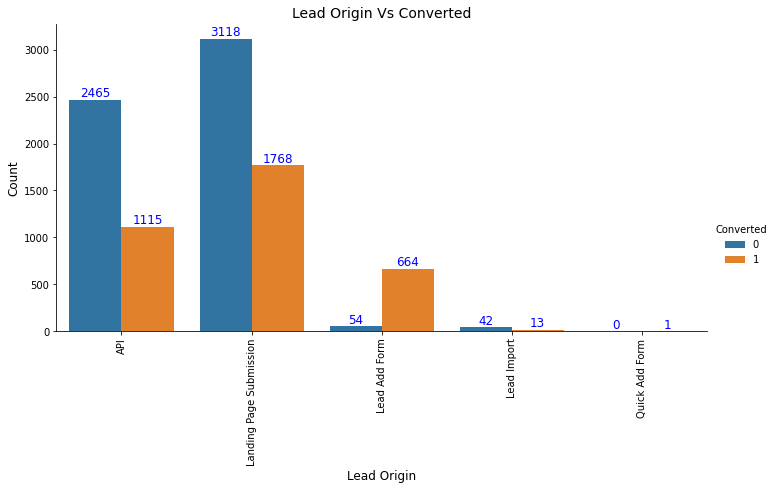

In [48]:
plotGraph("Lead Origin",leadScore_dataFrame)

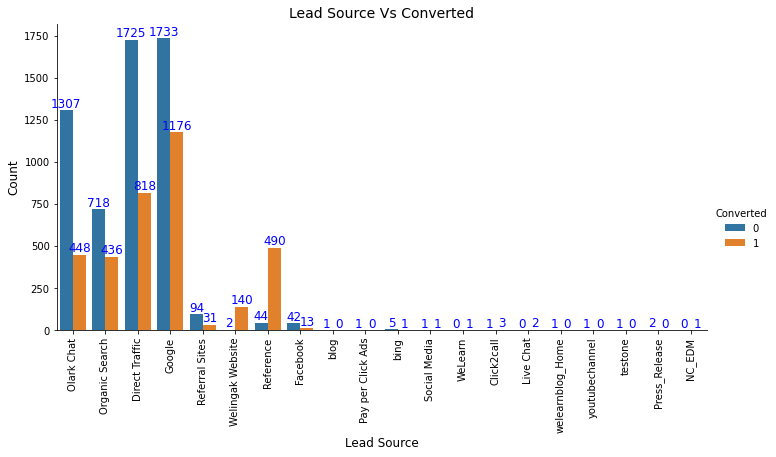

In [49]:
plotGraph("Lead Source",leadScore_dataFrame)

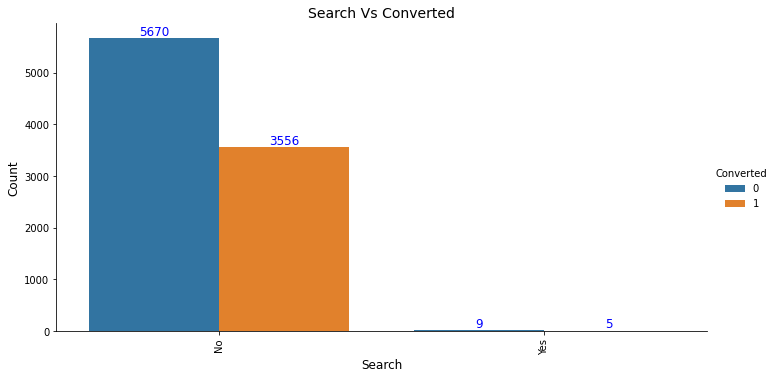

In [50]:
plotGraph("Search",leadScore_dataFrame)

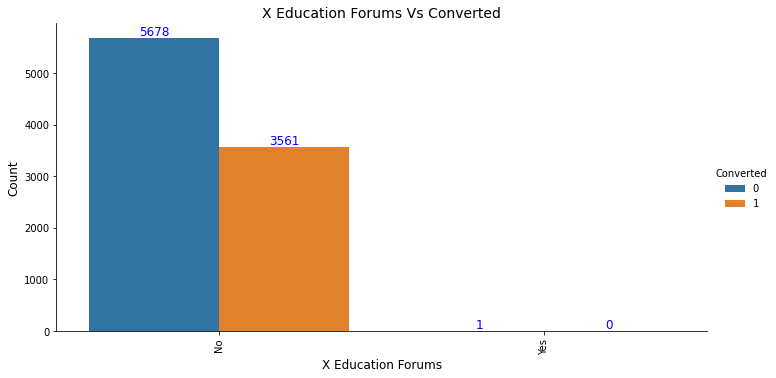

In [51]:
plotGraph("X Education Forums",leadScore_dataFrame)

In [52]:
# dropping this column as there is insigniificant Yes value
leadScore_dataFrame.drop(["X Education Forums"],axis=1,inplace=True)

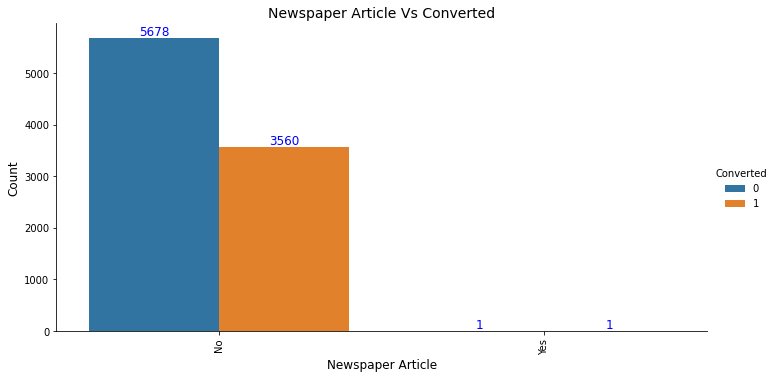

In [53]:
plotGraph("Newspaper Article",leadScore_dataFrame)

In [54]:
# dropping this column as there is insigniificant Yes value
leadScore_dataFrame.drop(["Newspaper Article"],axis=1,inplace=True)

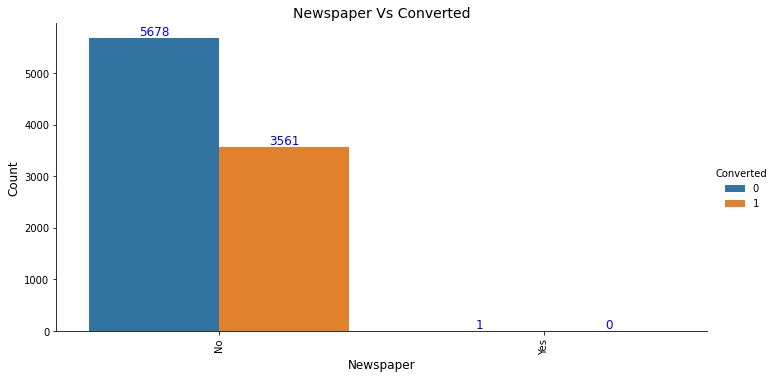

In [55]:
plotGraph("Newspaper",leadScore_dataFrame)

In [56]:
# dropping this column as there is insigniificant Yes value
leadScore_dataFrame.drop(["Newspaper"],axis=1,inplace=True)

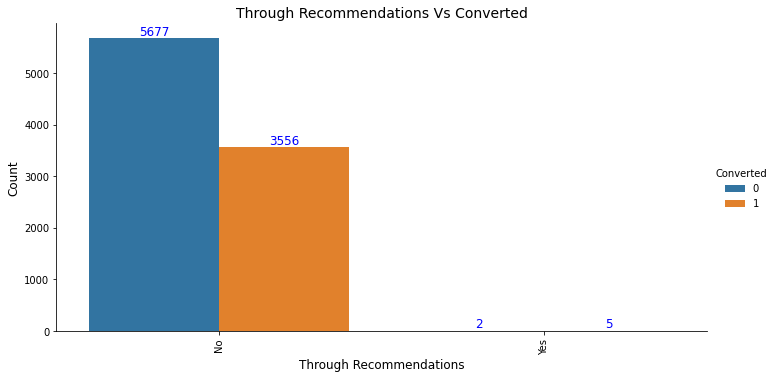

In [57]:
plotGraph("Through Recommendations",leadScore_dataFrame)

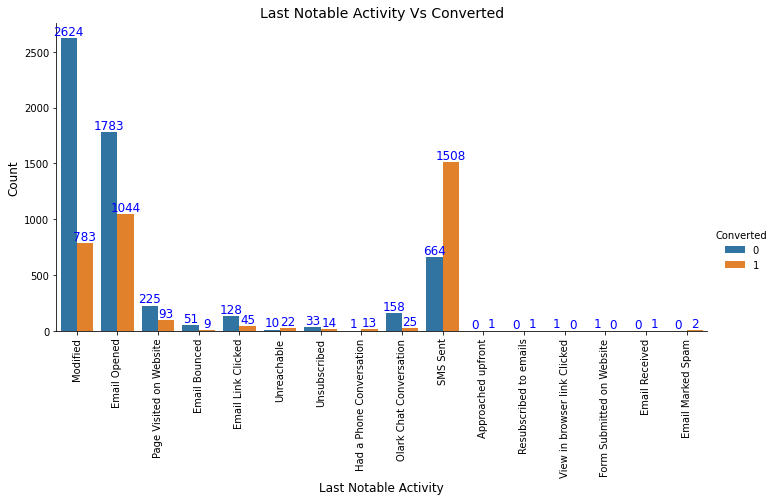

In [58]:
plotGraph("Last Notable Activity",leadScore_dataFrame)

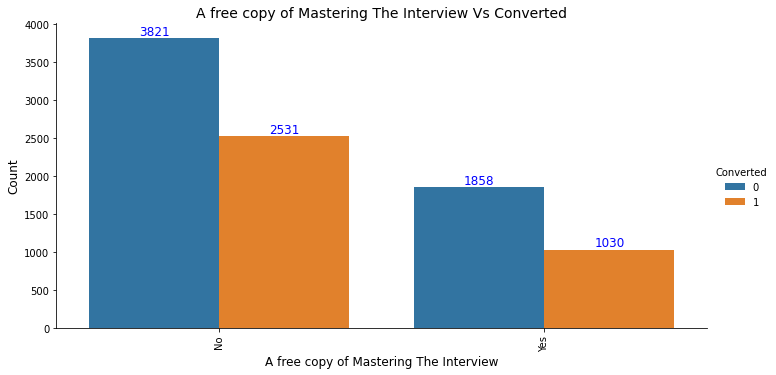

In [59]:
plotGraph("A free copy of Mastering The Interview",leadScore_dataFrame)

### Observations

* For Do Not Call, major conversion happened when calls were made, but 2 leads got converted when do not call was opted too.
* For Last Activity, most conversions happened when sms was sent.
* For Do Not Email, most conversions seen when email is sent.
* Most Unemployeed had posiive conversion rate.
* For Lead Origin, we see maximum conversion has happened from Landing Page.
* From Google as Lead Source, most conversions happened.
* Most conversions were found which were not Through Recommendations.
* Positive conversion rate was seen when a free copy of mastering the interview was not asked.

## Data Preparation for modeling

In [60]:
leadScore_dataFrame.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


In [61]:
leadScore_dataFrame.shape

(9240, 17)

In [62]:
leadScore_dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Do Not Call                             9240 non-null   object 
 6   Converted                               9240 non-null   int64  
 7   TotalVisits                             9240 non-null   float64
 8   Total Time Spent on Website             9240 non-null   int64  
 9   Page Views Per Visit                    9240 non-null   float64
 10  Last Activity                           9240 non-null   obje

In [63]:
# % of null values
leadScore_dataFrame.isnull().sum() / leadScore_dataFrame.shape[0] * 100.00

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
Search                                    0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [64]:
for col in leadScore_dataFrame.columns:
    print("*********",col,"************")
    print(leadScore_dataFrame[col].value_counts())
    print("*********************")

********* Prospect ID ************
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64
*********************
********* Lead Number ************
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
*********************
********* Lead Origin ************
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name:

In [65]:
binaryColumns =  ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 
                                 'A free copy of Mastering The Interview']

# Converting Yes/No columns to binary
def convertToBinary(x):
    return x.map({'Yes': 1, "No": 0})

leadScore_dataFrame[binaryColumns] = leadScore_dataFrame[binaryColumns].apply(convertToBinary)

In [66]:
for col in leadScore_dataFrame.columns:
    print("*********",col,"************")
    print(leadScore_dataFrame[col].value_counts())
    print("*********************")

********* Prospect ID ************
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64
*********************
********* Lead Number ************
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
*********************
********* Lead Origin ************
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name:

In [67]:
leadScore_dataFrame.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Search', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [68]:
# creating dummy variables

lastNotableActivityDummy = pd.get_dummies(leadScore_dataFrame['Last Notable Activity'], prefix='LastNotableActivityD')
lastNotableActivityDummy = lastNotableActivityDummy.drop(['LastNotableActivityD_Resubscribed to emails'], 1)
leadScore_dataFrame = pd.concat([leadScore_dataFrame,lastNotableActivityDummy], axis=1)
leadScore_dataFrame.drop([],axis=1,inplace=True)

leadOriginDummy = pd.get_dummies(leadScore_dataFrame['Lead Origin'], prefix='LeadOriginD')
leadOriginDummy = leadOriginDummy.drop(['LeadOriginD_Quick Add Form'], 1)
leadScore_dataFrame = pd.concat([leadScore_dataFrame, leadOriginDummy], axis = 1)

lastActivityDummy = pd.get_dummies(leadScore_dataFrame['Last Activity'], prefix='LastActivityD')
lastActivityDummy = lastActivityDummy.drop(['LastActivityD_Resubscribed to emails'], 1)
leadScore_dataFrame = pd.concat([leadScore_dataFrame,lastActivityDummy], axis=1)

currentOccupationDummy = pd.get_dummies(leadScore_dataFrame['What is your current occupation'], prefix='CurrentOccupationD')
currentOccupationDummy = currentOccupationDummy.drop(['CurrentOccupationD_Businessman'], 1)
leadScore_dataFrame = pd.concat([leadScore_dataFrame,currentOccupationDummy], axis=1)

leadSourceDummy = pd.get_dummies(leadScore_dataFrame['Lead Source'], prefix='LeadSourceD')
leadSourceDummy = leadSourceDummy.drop(['LeadSourceD_NC_EDM'], 1)
leadScore_dataFrame = pd.concat([leadScore_dataFrame,leadSourceDummy], axis=1)

#dropping columns who have dummy variables now
leadScore_dataFrame.drop(['Last Notable Activity','Lead Origin','Last Activity','What is your current occupation','Lead Source'],axis=1,inplace=True)

#dropping Prospect ID column since it is just a id
leadScore_dataFrame.drop(['Prospect ID'],axis=1,inplace=True)

In [69]:
leadScore_dataFrame.columns

Index(['Lead Number', 'Do Not Email', 'Do Not Call', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Search', 'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'LastNotableActivityD_Approached upfront',
       'LastNotableActivityD_Email Bounced',
       'LastNotableActivityD_Email Link Clicked',
       'LastNotableActivityD_Email Marked Spam',
       'LastNotableActivityD_Email Opened',
       'LastNotableActivityD_Email Received',
       'LastNotableActivityD_Form Submitted on Website',
       'LastNotableActivityD_Had a Phone Conversation',
       'LastNotableActivityD_Modified',
       'LastNotableActivityD_Olark Chat Conversation',
       'LastNotableActivityD_Page Visited on Website',
       'LastNotableActivityD_SMS Sent', 'LastNotableActivityD_Unreachable',
       'LastNotableActivityD_Unsubscribed',
       'LastNotableActivityD_View in browser link Clicked', 'LeadOriginD

In [70]:
leadScore_dataFrame.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,...,LeadSourceD_Reference,LeadSourceD_Referral Sites,LeadSourceD_Social Media,LeadSourceD_WeLearn,LeadSourceD_Welingak Website,LeadSourceD_bing,LeadSourceD_blog,LeadSourceD_testone,LeadSourceD_welearnblog_Home,LeadSourceD_youtubechannel
0,660737,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
leadScore_dataFrame.shape

(9240, 72)

we finally have the dataset ready to make a regression model.

## Model Preparation

In [72]:
y = leadScore_dataFrame['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [73]:
X = leadScore_dataFrame.drop(['Converted'],axis=1)
X.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,...,LeadSourceD_Reference,LeadSourceD_Referral Sites,LeadSourceD_Social Media,LeadSourceD_WeLearn,LeadSourceD_Welingak Website,LeadSourceD_bing,LeadSourceD_blog,LeadSourceD_testone,LeadSourceD_welearnblog_Home,LeadSourceD_youtubechannel
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,2.0,1532,2.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,660681,0,0,2.0,1428,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [75]:
X_train.describe()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,...,LeadSourceD_Reference,LeadSourceD_Referral Sites,LeadSourceD_Social Media,LeadSourceD_WeLearn,LeadSourceD_Welingak Website,LeadSourceD_bing,LeadSourceD_blog,LeadSourceD_testone,LeadSourceD_welearnblog_Home,LeadSourceD_youtubechannel
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0,6468.000000,6468.000000
mean,617186.001546,0.078386,0.000309,3.467687,483.875850,2.347738,0.001701,0.000464,0.001082,0.311843,...,0.060297,0.014224,0.000309,0.000155,0.014069,0.000464,0.000155,0.0,0.000155,0.000155
std,23372.003514,0.268799,0.017583,5.283025,546.565663,2.162947,0.041207,0.021533,0.032882,0.463282,...,0.238054,0.118422,0.017583,0.012434,0.117786,0.021533,0.012434,0.0,0.012434,0.012434
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,596516.250000,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,615720.500000,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,637348.750000,0.000000,0.000000,5.000000,926.500000,3.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,660728.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [76]:
scaler = MinMaxScaler()

In [77]:
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,...,LeadSourceD_Reference,LeadSourceD_Referral Sites,LeadSourceD_Social Media,LeadSourceD_WeLearn,LeadSourceD_Welingak Website,LeadSourceD_bing,LeadSourceD_blog,LeadSourceD_testone,LeadSourceD_welearnblog_Home,LeadSourceD_youtubechannel
1871,641410,0,0,0.000000,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,597687,0,0,0.015936,0.214349,0.024182,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3516,626825,0,0,0.019920,0.046655,0.045455,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,587928,0,0,0.019920,0.541373,0.090909,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3934,622366,0,0,0.000000,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Building models

In [78]:
logisicRegModel = LogisticRegression()

In [79]:
#feature selection
rfe = RFE(estimator = logisicRegModel, n_features_to_select =  10)
rfe = rfe.fit(X_train, y_train)

In [80]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('Do Not Email', False, 6),
 ('Do Not Call', False, 40),
 ('TotalVisits', False, 50),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('Search', False, 49),
 ('Digital Advertisement', False, 37),
 ('Through Recommendations', False, 36),
 ('A free copy of Mastering The Interview', False, 7),
 ('LastNotableActivityD_Approached upfront', False, 62),
 ('LastNotableActivityD_Email Bounced', False, 24),
 ('LastNotableActivityD_Email Link Clicked', False, 20),
 ('LastNotableActivityD_Email Marked Spam', False, 47),
 ('LastNotableActivityD_Email Opened', False, 11),
 ('LastNotableActivityD_Email Received', False, 46),
 ('LastNotableActivityD_Form Submitted on Website', False, 51),
 ('LastNotableActivityD_Had a Phone Conversation', False, 29),
 ('LastNotableActivityD_Modified', True, 1),
 ('LastNotableActivityD_Olark Chat Conversation', False, 16),
 ('LastNotableActivityD_Page Visited on Website', False, 19),
 ('LastNotableActivityD_

In [81]:
# features selected
colsSelected = X_train.columns[rfe.support_]
colsSelected

Index(['Lead Number', 'Total Time Spent on Website',
       'LastNotableActivityD_Modified', 'LastNotableActivityD_SMS Sent',
       'LeadOriginD_API', 'LeadOriginD_Lead Add Form',
       'LastActivityD_Olark Chat Conversation', 'LastActivityD_SMS Sent',
       'CurrentOccupationD_Unknown',
       'CurrentOccupationD_Working Professional'],
      dtype='object')

In [82]:
# creating first model
X_train_sm1 = sm.add_constant(X_train[colsSelected])
logisicRegModel1 = sm.GLM(y_train,X_train_sm1, family = sm.families.Binomial())
res = logisicRegModel1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2680.3
Date:                Mon, 17 Jul 2023   Deviance:                       5360.6
Time:                        21:17:25   Pearson chi2:                 6.53e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3938
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -8.0496      0.946     -8.507      0.000      -9.904      -6.195
Lead Number                              9.878e-06   1.52e-06      6.488      0.000    6.89e-06    1.29e-05
Total Time Spent on Website                 4.0078      0.151     26.591      0.000       3.712       4.303
LastNotableActivityD_Modified              -0.8568      0.094     -9.109      0.000      -1.041      -0.672
LastNotableActivityD_SMS Sent               0.3058      0.176      1.735      0.083      -0.040       0.651
LeadOriginD_API                             0.7157      0.077      9.311      0.000       0.565       0.866
LeadOriginD_Lead Add Form                   3.6321      0.181     20.043      0.000       3.277       3.987
LastActivityD_Olark Chat Conversation      -0.5881      0.174     -3.387      0.001      -0.929      -0.248
LastActivityD_SMS Sent                      1.0367      0.155      6.680      0.000       0.733       1.341
CurrentOccupationD_Unknown                 -1.0631      0.087    -12.261      0.000      -1.233      -0.893
CurrentOccupationD_Working Professional     2.5823      0.187     13.793      0.000       2.215       2.949
===========================================================================================================
"""

In [83]:
# calculating VIF

vif = pd.DataFrame()
vif['Features'] = colsSelected
vif['VIF'] = [variance_inflation_factor(X_train[colsSelected].values, i) for i in range(X_train[colsSelected].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,LastNotableActivityD_SMS Sent,6.41
7,LastActivityD_SMS Sent,6.10
0,Lead Number,5.23
2,LastNotableActivityD_Modified,2.39
4,LeadOriginD_API,2.07
1,Total Time Spent on Website,2.05
8,CurrentOccupationD_Unknown,1.64
6,LastActivityD_Olark Chat Conversation,1.51
5,LeadOriginD_Lead Add Form,1.28
9,CurrentOccupationD_Working Professional,1.18


In [84]:
# removing LastNotableActivityD_SMS Sent as it has high VIF
X_train_New = X_train[colsSelected].drop('LastNotableActivityD_SMS Sent', axis = 1)
# creating new model
X_train_sm2 = sm.add_constant(X_train_New)
logisicRegModel2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
res = logisicRegModel2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2681.8
Date:                Mon, 17 Jul 2023   Deviance:                       5363.6
Time:                        21:17:25   Pearson chi2:                 6.54e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3935
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -7.8631      0.939     -8.370      0.000      -9.704      -6.022
Lead Number                              9.622e-06   1.51e-06      6.354      0.000    6.65e-06    1.26e-05
Total Time Spent on Website                 4.0078      0.151     26.597      0.000       3.712       4.303
LastNotableActivityD_Modified              -0.9435      0.080    -11.743      0.000      -1.101      -0.786
LeadOriginD_API                             0.7178      0.077      9.346      0.000       0.567       0.868
LeadOriginD_Lead Add Form                   3.6300      0.181     20.016      0.000       3.275       3.985
LastActivityD_Olark Chat Conversation      -0.5493      0.172     -3.185      0.001      -0.887      -0.211
LastActivityD_SMS Sent                      1.2720      0.075     16.897      0.000       1.124       1.420
CurrentOccupationD_Unknown                 -1.0802      0.086    -12.541      0.000      -1.249      -0.911
CurrentOccupationD_Working Professional     2.5886      0.187     13.807      0.000       2.221       2.956
===========================================================================================================
"""

In [85]:
vif = pd.DataFrame()
vif['Features'] = X_train_New.columns
vif['VIF'] = [variance_inflation_factor(X_train_New.values, i) for i in range(X_train_New.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,5.00
3,LeadOriginD_API,2.06
1,Total Time Spent on Website,2.04
2,LastNotableActivityD_Modified,1.83
7,CurrentOccupationD_Unknown,1.62
6,LastActivityD_SMS Sent,1.57
5,LastActivityD_Olark Chat Conversation,1.47
4,LeadOriginD_Lead Add Form,1.28
8,CurrentOccupationD_Working Professional,1.18


In [86]:
# removing Lead Number as it has high VIF
X_train_New = X_train_New.drop('Lead Number', axis = 1)
# creating new model
X_train_sm3 = sm.add_constant(X_train_New)
logisicRegModel3 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial())
res = logisicRegModel3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6459
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2702.2
Date:                Mon, 17 Jul 2023   Deviance:                       5404.3
Time:                        21:17:25   Pearson chi2:                 6.63e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3897
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.9324      0.076    -25.435      0.000      -2.081      -1.783
Total Time Spent on Website                 4.0544      0.150     26.983      0.000       3.760       4.349
LastNotableActivityD_Modified              -0.8949      0.079    -11.261      0.000      -1.051      -0.739
LeadOriginD_API                             0.7522      0.077      9.831      0.000       0.602       0.902
LeadOriginD_Lead Add Form                   3.6810      0.180     20.404      0.000       3.327       4.035
LastActivityD_Olark Chat Conversation      -0.5951      0.171     -3.482      0.000      -0.930      -0.260
LastActivityD_SMS Sent                      1.1790      0.073     16.096      0.000       1.035       1.323
CurrentOccupationD_Unknown                 -1.0617      0.086    -12.335      0.000      -1.230      -0.893
CurrentOccupationD_Working Professional     2.5578      0.186     13.757      0.000       2.193       2.922
===========================================================================================================
"""

In [87]:
vif = pd.DataFrame()
vif['Features'] = X_train_New.columns
vif['VIF'] = [variance_inflation_factor(X_train_New.values, i) for i in range(X_train_New.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,LeadOriginD_API,1.66
1,LastNotableActivityD_Modified,1.60
4,LastActivityD_Olark Chat Conversation,1.47
6,CurrentOccupationD_Unknown,1.45
0,Total Time Spent on Website,1.44
5,LastActivityD_SMS Sent,1.38
3,LeadOriginD_Lead Add Form,1.16
7,CurrentOccupationD_Working Professional,1.16


VIF values and P values seem to be acceptable and the model seems to be stable now, we can go ahead with model evaluation

## Model Evaluation

In [88]:
finalColsSelected = X_train_New.columns

In [89]:
X_Train_sm_final = sm.add_constant(X_train[finalColsSelected])

In [90]:
y_train_pred = res.predict(X_Train_sm_final)

In [91]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23502844, 0.25667734, 0.27071997, 0.80870703, 0.11155176,
       0.98884724, 0.14421817, 0.98236637, 0.1567846 , 0.94203029])

In [92]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Pred':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Pred
0,0,0.235028
1,0,0.256677
2,0,0.270720
3,0,0.808707
4,0,0.111552


In [93]:
y_train_pred_final['Lead Score'] = y_train_pred_final.Conversion_Pred.map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Conversion_Pred,Lead Score
0,0,0.235028,24
1,0,0.256677,26
2,0,0.270720,27
3,0,0.808707,81
4,0,0.111552,11


In [94]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Pred.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Pred,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.235028,24,1,1,1,0,0,0,0,0,0,0
1,0,0.256677,26,1,1,1,0,0,0,0,0,0,0
2,0,0.270720,27,1,1,1,0,0,0,0,0,0,0
3,0,0.808707,81,1,1,1,1,1,1,1,1,1,0
4,0,0.111552,11,1,1,0,0,0,0,0,0,0,0


In [95]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.622604  0.972019  0.407296
0.2   0.2  0.744589  0.915247  0.639430
0.3   0.3  0.784941  0.828467  0.758121
0.4   0.4  0.802721  0.764396  0.826337
0.5   0.5  0.806741  0.669911  0.891054
0.6   0.6  0.798083  0.595702  0.922789
0.7   0.7  0.783086  0.521492  0.944278
0.8   0.8  0.760668  0.420114  0.970515
0.9   0.9  0.710884  0.256691  0.990755


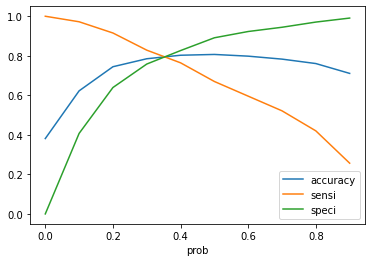

In [96]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

we can see cut off is at around 0.38

In [97]:
# converting to binary value
y_train_pred_final['Predicted_Values'] = y_train_pred_final.Conversion_Pred.map(lambda x: 1 if x > 0.38 else 0)

y_train_pred_final[:10]

,Converted,Conversion_Pred,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_Values
0,0,0.235028,24,1,1,1,0,0,0,0,0,0,0,0
1,0,0.256677,26,1,1,1,0,0,0,0,0,0,0,0
2,0,0.270720,27,1,1,1,0,0,0,0,0,0,0,0
3,0,0.808707,81,1,1,1,1,1,1,1,1,1,0,1
4,0,0.111552,11,1,1,0,0,0,0,0,0,0,0,0
5,1,0.988847,99,1,1,1,1,1,1,1,1,1,1,1
6,0,0.144218,14,1,1,0,0,0,0,0,0,0,0,0
7,1,0.982366,98,1,1,1,1,1,1,1,1,1,1,1
8,0,0.156785,16,1,1,0,0,0,0,0,0,0,0,0
9,1,0.942030,94,1,1,1,1,1,1,1,1,1,1,1


In [98]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_Values )
print(confusion)

[[3255  747]
 [ 545 1921]]


In [99]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_Values))

0.8002473716759431


accuracy of ~ 80% is pretty good

In [100]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [101]:
print("Sensitivity - ",TP/(TP+FN))

Sensitivity -  0.7789943227899432


In [102]:
print("Specificity - ",TN/(TN+FP))

Specificity -  0.8133433283358321


In [103]:
# plotting an ROC Curve
def draw_roc( actual, pred ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, pred,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, pred )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [104]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Predicted_Values, 
                                         drop_intermediate = False )

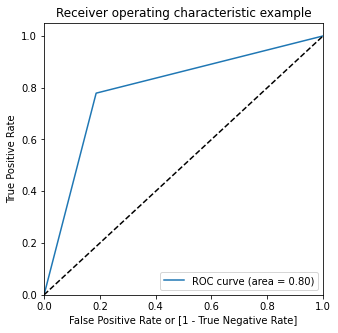

In [105]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Predicted_Values)

In [106]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_test = X_test[finalColsSelected]
X_test_sm = sm.add_constant(X_test)

In [107]:
y_test_pred = res.predict(X_test_sm)
y_test_pred =  pd.DataFrame(y_test_pred)
test_df = pd.DataFrame(y_test)

In [108]:
test_df['LeadId'] = test_df.index

In [109]:
test_df.head()

,Converted,LeadId
4269,1,4269
2376,1,2376
7766,1,7766
9199,0,9199
4359,1,4359


In [110]:
y_test_pred.head()

,0
4269,0.680600
2376,0.949199
7766,0.815157
9199,0.064762
4359,0.851783


In [111]:
y_test_pred.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
y_predicted_final = pd.concat([test_df, y_test_pred],axis=1)
y_predicted_final.head()

,Converted,LeadId,0
0,1,4269,0.680600
1,1,2376,0.949199
2,1,7766,0.815157
3,0,9199,0.064762
4,1,4359,0.851783


In [112]:
y_predicted_final= y_predicted_final.rename(columns={ 0 : 'Converted_Predicted'})

In [113]:
y_predicted_final.head()

,Converted,LeadId,Converted_Predicted
0,1,4269,0.680600
1,1,2376,0.949199
2,1,7766,0.815157
3,0,9199,0.064762
4,1,4359,0.851783


In [114]:
# since cut off was 0.38
y_predicted_final['predicted_final'] = y_predicted_final.Converted_Predicted.map(lambda x: 1 if x > 0.38 else 0)
y_predicted_final['predicted_lead_score'] = y_predicted_final.Converted_Predicted.map(lambda x: round(x*100))
y_predicted_final.head(5)

,Converted,LeadId,Converted_Predicted,predicted_final,predicted_lead_score
0,1,4269,0.680600,1,68
1,1,2376,0.949199,1,95
2,1,7766,0.815157,1,82
3,0,9199,0.064762,0,6
4,1,4359,0.851783,1,85


In [115]:
metrics.accuracy_score(y_predicted_final.Converted, y_predicted_final.predicted_final)

0.8095238095238095

accuracy of ~ 80% on test data is good.

In [116]:
print('precision ',precision_score(y_predicted_final.Converted, y_predicted_final.predicted_final))

# recall
print('recall ',recall_score(y_predicted_final.Converted, y_predicted_final.predicted_final))

precision  0.7450302506482281
recall  0.7872146118721461


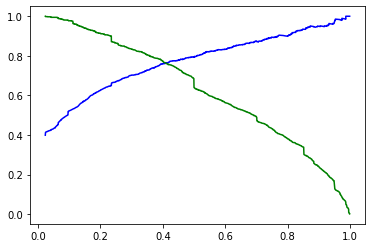

In [117]:
# Precision and Recall TradeOff
p, r, thresholds = precision_recall_curve(y_predicted_final.Converted, y_predicted_final.Converted_Predicted)
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "g-")
plt.show()

In [118]:
fpr, tpr, thresholds = metrics.roc_curve( y_predicted_final.Converted, y_predicted_final.Converted_Predicted, 
                                         drop_intermediate = False )

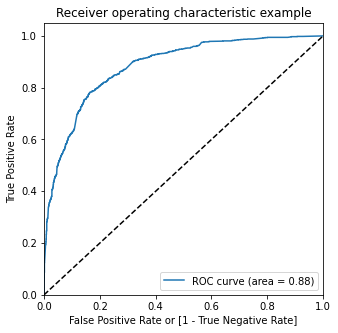

In [119]:
draw_roc(y_predicted_final.Converted, y_predicted_final.Converted_Predicted)

In [120]:
confusion = metrics.confusion_matrix(y_predicted_final.Converted, y_predicted_final.predicted_final )
print(confusion)

[[1382  295]
 [ 233  862]]


In [121]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [122]:
print("Specificity - ",TN/(TN+FP))

Specificity -  0.8240906380441264


In [123]:
print("Sensitivity - ",TP/(TP+FN))

Sensitivity -  0.7872146118721461


## Conclusion

* we see accuracy of about 80% on test data and about 80% on train data.
* Specificity, Sensitivity of test data is 0.82 and 0.78 respectively.
* Specificity, Sensitivity of train data is 0.81 and 0.77 respectively.
* Precision score on test data is 0.74 and Recall score is 0.78.
* model seems to perform good on train and test set.